In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# IQR

1. Sort the data
2. Calculate Q1(25%) and Q3(75%)
3. IQR (Q3 - Q1)
4. Find the Lower Fence(Q1-1.5(IQR))
5. Find the Upper Fence(Q3+1.5(IQR))

In [41]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [42]:
data = sorted(dataset)

In [43]:
data

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

# Percentile Find

In [44]:
Q1,Q3 = np.percentile(data,[25,75])

In [45]:
Q1

np.float64(12.0)

In [46]:
Q3

np.float64(15.0)

## IQR Find

In [47]:
IQR = Q3 - Q1
print(IQR)

3.0


In [48]:
LF = Q1 - 1.5*IQR
print(LF)


7.5


In [49]:
UF = Q3 + 1.5*IQR
print(UF)

19.5


In [50]:
# write a function in python that will filter the non outliers element from data

In [51]:
non_outliers = [x for x in data if LF <= x <= UF]
non_outliers

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19]

In [52]:
outliers = [x for x in data if x < LF or x > UF]
outliers

[102, 107, 108]

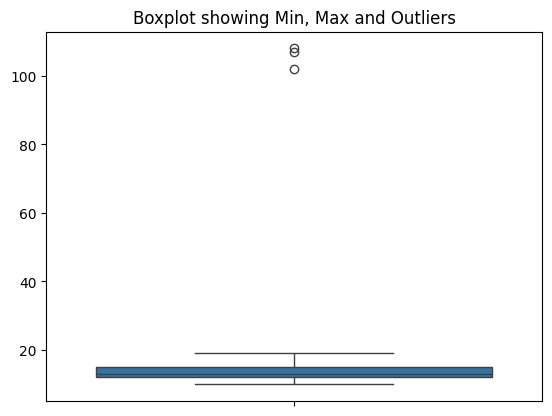

In [53]:
sns.boxplot(data)
plt.title("Boxplot showing Min, Max and Outliers")
plt.show()

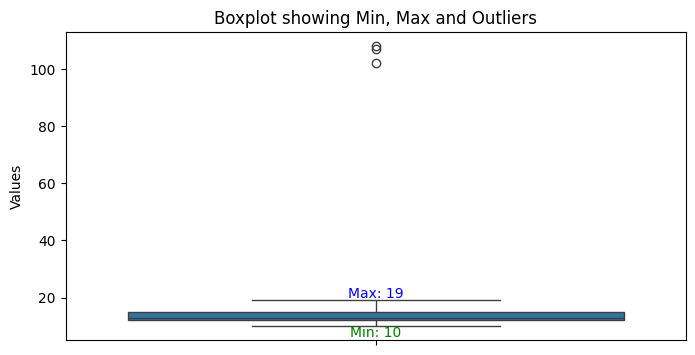

In [61]:
plt.figure(figsize=(8,4))
sns.boxplot(y=data)

# Annotate min & max (correct coordinates)
plt.text(0, min_val, f"Min: {min_val}", color="green", ha="center", va="top")
plt.text(0, max_val, f"Max: {max_val}", color="blue", ha="center", va="bottom")

plt.title("Boxplot showing Min, Max and Outliers")
plt.ylabel("Values")
plt.show()


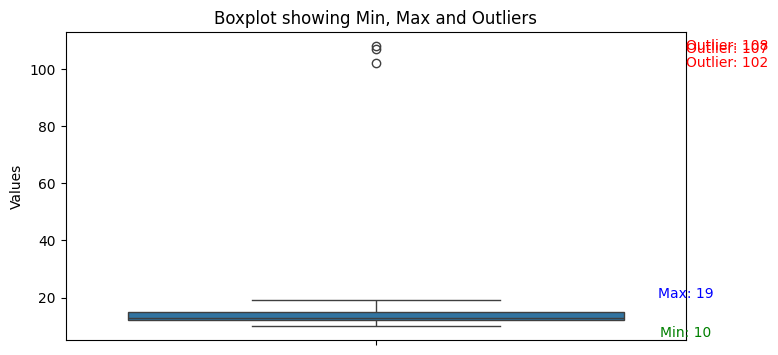

In [65]:
# ---- Plot ----
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(y=data, ax=ax)

# 🔑 Correct x-position = 0.5
x_pos = 0.5

# Min & Max
ax.text(x_pos, min_val, f"Min: {min_val}",
        color="green", ha="center", va="top")

ax.text(x_pos, max_val, f"Max: {max_val}",
        color="blue", ha="center", va="bottom")

# Outliers
for out in outliers:
    ax.text(x_pos, out, f"Outlier: {out}",
            color="red", ha="left", va="center")

ax.set_title("Boxplot showing Min, Max and Outliers")
ax.set_ylabel("Values")

plt.show()

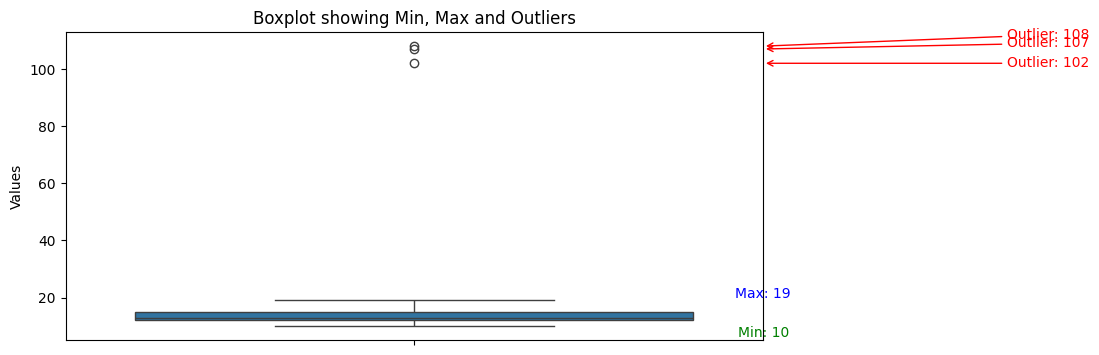

In [66]:

min_val = min(x for x in data if x >= LF)
max_val = max(x for x in data if x <= UF)
outliers = sorted(x for x in data if x < LF or x > UF)

# ---- Plot ----
fig, ax = plt.subplots(figsize=(9,4))
sns.boxplot(y=data, ax=ax)

x_pos = 0.5  # correct box position

# Min & Max annotations
ax.text(x_pos, min_val, f"Min: {min_val}",
        color="green", ha="center", va="top")

ax.text(x_pos, max_val, f"Max: {max_val}",
        color="blue", ha="center", va="bottom")

# ---- Outliers with arrows (NO overlap) ----
for i, out in enumerate(outliers):
    ax.annotate(
        f"Outlier: {out}",
        xy=(x_pos, out),
        xytext=(x_pos + 0.35, out + i * 2),
        arrowprops=dict(arrowstyle="->", color="red"),
        color="red",
        ha="left",
        va="center"
    )

ax.set_title("Boxplot showing Min, Max and Outliers")
ax.set_ylabel("Values")

plt.show()

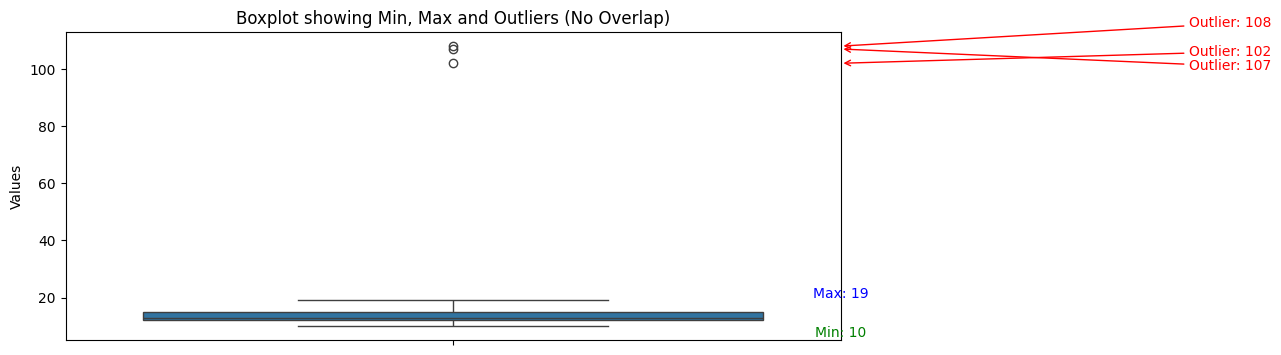

In [67]:

# ---- Plot ----
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(y=data, ax=ax)

x_pos = 0.5  # box center

# Min & Max
ax.text(x_pos, min_val, f"Min: {min_val}",
        color="green", ha="center", va="top")

ax.text(x_pos, max_val, f"Max: {max_val}",
        color="blue", ha="center", va="bottom")

# ---- Outliers (NO overlap) ----
base_offset = 4  # vertical spacing

for i, out in enumerate(outliers):
    direction = 1 if i % 2 == 0 else -1   # alternate up/down
    y_text = out + direction * (base_offset + i * 2)
    x_text = x_pos + 0.45

    ax.annotate(
        f"Outlier: {out}",
        xy=(x_pos, out),
        xytext=(x_text, y_text),
        arrowprops=dict(arrowstyle="->", color="red"),
        color="red",
        ha="left",
        va="center"
    )

ax.set_title("Boxplot showing Min, Max and Outliers (No Overlap)")
ax.set_ylabel("Values")

plt.show()